# Análise Exploratória de Dados dos Filmes Star Wars
**Objetivo**: Explorar os dados relacionados aos filmes da franquia Star Wars, enriquecidos pela API OMDb, para gerar insights de desempenho.

**Ferramentas**: Python, SQLAlchemy, Pandas, Numpy Matplotlib, Seaborn, MySQL.


In [51]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sqlalchemy import create_engine

# Configuração para visualizações
sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (10, 6)


In [52]:
# Configuração do banco de dados MySQL
DB_USERNAME = "root"
DB_PASSWORD = "123456"
DB_HOST = "localhost"
DB_PORT = "3306"
DB_NAME = "star_wars"

# Criação da engine do SQLAlchemy
engine = create_engine(f"mysql+pymysql://{DB_USERNAME}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

# Testando a conexão
try:
    with engine.connect() as conn:
        print("Conexão com o banco de dados bem-sucedida!")
except Exception as e:
    print(f"Erro ao conectar ao banco de dados: {e}")


Conexão com o banco de dados bem-sucedida!


In [53]:
# Consultando os dados da tabela de filmes
query = """
SELECT 
    title, episode_id, director, producer, release_date, BoxOffice, imdbRating, tomatoesRating, 
    Metascore, Genre, Runtime, Language, Awards, imdbVotes 
FROM star_wars.films;
"""
df_films = pd.read_sql(query, con=engine)

# Visualizando as primeiras linhas
df_films.head()


,title,episode_id,director,producer,release_date,BoxOffice,imdbRating,tomatoesRating,Metascore,Genre,Runtime,Language,Awards,imdbVotes
0,A New Hope,4,George Lucas,"Gary Kurtz, Rick McCallum",1977-05-25,460998507,86,93,90,"Action, Adventure, Fantasy",121 min,English,Won 6 Oscars. 69 wins & 30 nominations total,1479635
1,The Empire Strikes Back,5,Irvin Kershner,"Gary Kurtz, Rick McCallum",1980-05-17,292753960,87,95,82,"Action, Adventure, Fantasy",124 min,English,Won 1 Oscar. 27 wins & 20 nominations total,1410938
2,Return of the Jedi,6,Richard Marquand,"Howard G. Kazanjian, George Lucas, Rick McCallum",1983-05-25,316566101,83,82,58,"Action, Adventure, Fantasy",131 min,"English, Kikuyu, Tagalog, Kalmyk-Oirat, Quechu...",Nominated for 4 Oscars. 25 wins & 23 nominatio...,1141461
3,The Phantom Menace,1,George Lucas,Rick McCallum,1999-05-19,487576624,65,52,51,"Action, Adventure, Fantasy",136 min,"English, Sanskrit",Nominated for 3 Oscars. 28 wins & 71 nominatio...,876387
4,Attack of the Clones,2,George Lucas,Rick McCallum,2002-05-16,310676740,66,65,54,"Action, Adventure, Fantasy",142 min,English,Nominated for 1 Oscar. 21 wins & 71 nomination...,773661


In [54]:
# Verificando valores nulos
df_films.isnull().sum()

# Resumo estatístico
df_films.describe()



,episode_id,BoxOffice,imdbRating,tomatoesRating,Metascore,imdbVotes
count,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000e+00
mean,3.500000,3.748071e+08,77.166667,77.833333,67.166667,1.090916e+06
std,1.870829,8.296169e+07,9.826834,16.606224,15.879757,3.014965e+05
min,1.000000,2.927540e+08,65.000000,52.000000,51.000000,7.736610e+05
25%,2.250000,3.121491e+08,68.500000,68.750000,55.000000,8.666595e+05
50%,3.500000,3.484183e+08,79.500000,81.000000,63.000000,1.008924e+06
75%,4.750000,4.408165e+08,85.250000,90.250000,78.500000,1.343569e+06
max,6.000000,4.875766e+08,87.000000,95.000000,90.000000,1.479635e+06


#### Filmes por bilheteria

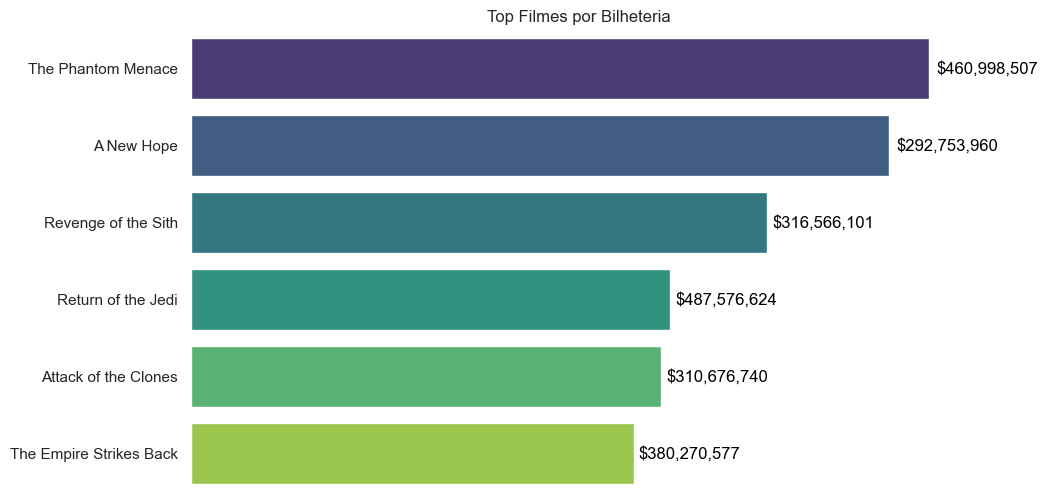

In [ ]:
# Bilheteria por filme (top 10)
top_boxoffice = df_films.sort_values('BoxOffice', ascending=False)

fig = plt.gcf()
dpi = fig.dpi
ax = sns.barplot(x="BoxOffice", y="title", data=top_boxoffice, palette="viridis")
ax.spines[['top','right','left','bottom']].set_visible(False)

for index, p in enumerate(ax.patches):
    bilheteria = f"${top_boxoffice['BoxOffice'][index]:,}"
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(    
        f'{bilheteria}',
        (x + width*1.01, y + height/2),
        ha='left',
        va='center',
        color='black',
    )

plt.title("Top Filmes por Bilheteria")
plt.xlabel("")
plt.ylabel("") 
plt.xticks([])
plt.show()





#### Impacto negativo das avaliações na bilheteria

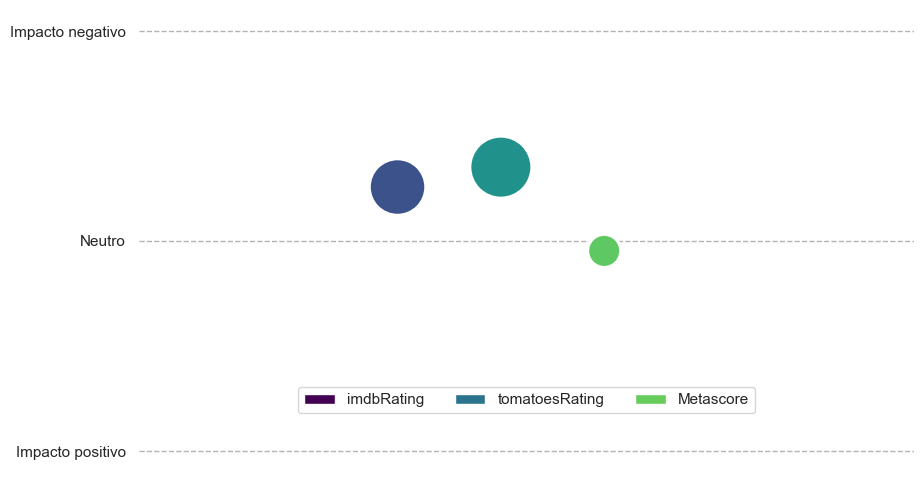

In [56]:
df_ratings = df_films[['BoxOffice', 'imdbRating', 'tomatoesRating', 'Metascore']]

# Calculate the correlation matrix (this part is not used in the plot)
correlation_matrix = df_ratings.corr()

# Extract correlations with BoxOffice
correlation_with_boxoffice = correlation_matrix['BoxOffice']
correlation_with_boxoffice = correlation_with_boxoffice.drop(labels='BoxOffice')

# Create a DataFrame for easier plotting
correlation_df = correlation_with_boxoffice.reset_index()
correlation_df.columns = ['RatingType', 'Correlation']
correlation_df['InvertedCorrelation'] = correlation_df['Correlation'].apply(lambda x: x * -1)


correlation_df.head()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='RatingType', y='InvertedCorrelation', hue='RatingType', data=correlation_df, palette='viridis', size="InvertedCorrelation",sizes=(570, 2000),legend=False)

plt.gca().set_yticks([-1,0,1])
plt.yticks([-1, 0, 1], ["Impacto positivo", "Neutro", "Impacto negativo"])
plt.ylim(-1.1, 1.1) 
plt.xlim(-2.5, 5)
plt.xlabel("")
plt.ylabel("") 
plt.xticks([])

legend_elements = []
rating_types = correlation_df['RatingType'] #Get the unique values
n_colors = len(rating_types)
for i, rating in enumerate(rating_types):
    color = plt.get_cmap('viridis')(i / (n_colors - 0.4))
    patch = mpatches.Patch(facecolor=color, label=rating)
    legend_elements.append(patch)

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.2), ncol=len(legend_elements))
plt.grid(True, which='major', axis='both', linestyle='--', color='0.7')

ax = plt.gca()
ax.spines[['top','right','left','bottom']].set_visible(False)
plt.show()


#### Bilheteria ao longo do tempo

In [57]:
df_ratings_per_release_date = df_films[['title', 'episode_id', 'release_date', 'BoxOffice']]

df_ratings_per_release_date['days_diff'] = (pd.to_datetime(df_ratings_per_release_date['release_date'].shift(-1)) - pd.to_datetime(df_ratings_per_release_date['release_date'])).dt.days
df_ratings_per_release_date['years_diff'] = (df_ratings_per_release_date['days_diff']/365.25).round(1)
correlation = df_ratings_per_release_date[['years_diff','BoxOffice']].corr() 



C:\Users\feleite\AppData\Local\Temp\ipykernel_2864\1019165660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings_per_release_date['days_diff'] = (pd.to_datetime(df_ratings_per_release_date['release_date'].shift(-1)) - pd.to_datetime(df_ratings_per_release_date['release_date'])).dt.days
C:\Users\feleite\AppData\Local\Temp\ipykernel_2864\1019165660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings_per_release_date['years_diff'] = (df_ratings_per_release_date['days_diff']/365.25).round

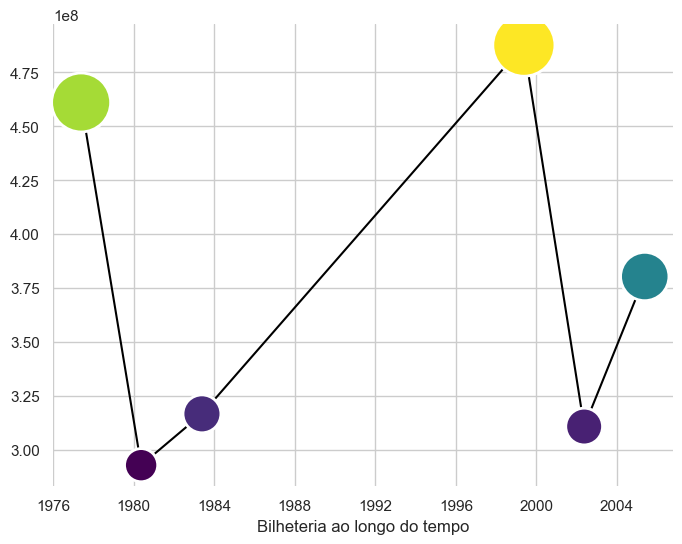

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='release_date', y='BoxOffice', data=df_ratings_per_release_date,color='black',zorder=1) 
ax = sns.scatterplot(x='release_date', y='BoxOffice', data=df_ratings_per_release_date,palette='viridis', hue='BoxOffice', size="BoxOffice",sizes=(570, 2000),legend=False,zorder=2) 
ax.spines[['top','right','left','bottom']].set_visible(False)


plt.xlabel("Bilheteria ao longo do tempo") 
plt.ylabel("") 


plt.show()

#### Impacto em bilheteria por roteirista e diretor

In [60]:
query = "SELECT director, AVG(BoxOffice) as avg_boxoffice, SUM(BoxOffice) as sum_boxoffice FROM films GROUP BY director ORDER BY avg_boxoffice DESC;"
df_director = pd.read_sql(query, con=engine)
df_director['formated_avg_boxoffice'] = df_director['avg_boxoffice'].map(lambda x: f"${x:,.0f}")
df_director['formated_sum_boxoffice'] = df_director['sum_boxoffice'].map(lambda x: f"${x:,.0f}")

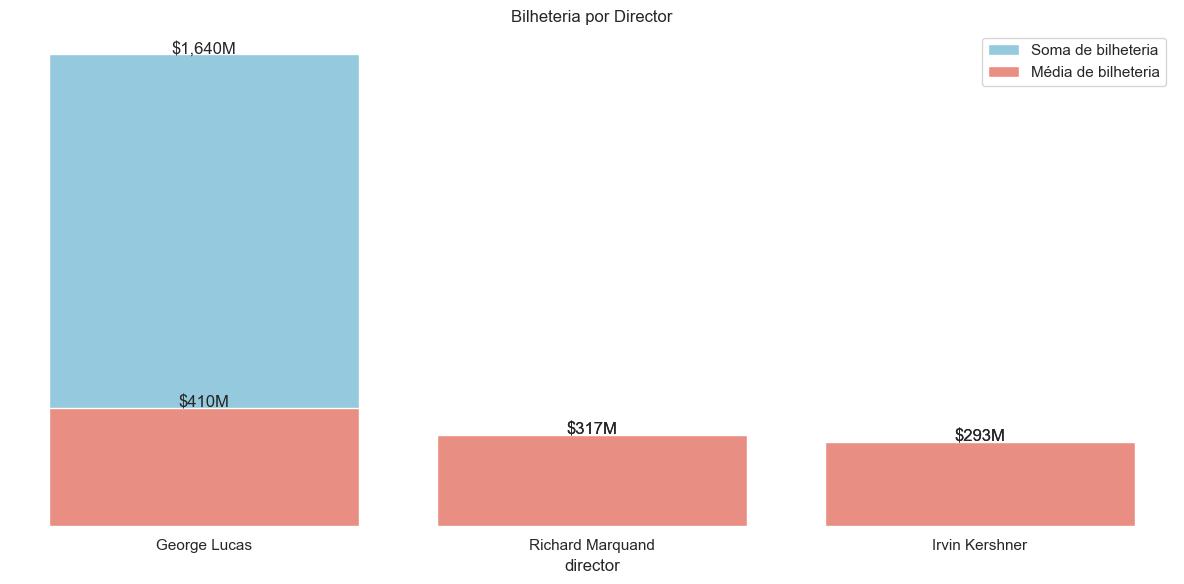

In [61]:
# Set a wider figure
plt.figure(figsize=(12, 6))  # Adjust as needed


# Plotting using a grouped bar chart with Seaborn
sns.set_palette("pastel") # Example: a different palette to differentiate both bars for the same director
ax = sns.barplot(data=df_director, x='director', y='sum_boxoffice', color="skyblue", label="Soma de bilheteria") #first bar
ax = sns.barplot(data=df_director, x='director', y='avg_boxoffice', color="salmon", label = "Média de bilheteria") #second bar, superimposed over the first
ax.spines[['top','right','left','bottom']].set_visible(False)

# Add labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3e6, f'${height/1e6:,.0f}M',ha="center")



# Customize the plot
plt.xticks(ha='center')  # Rotate x-axis labels if needed
plt.ylabel("")
plt.yticks([])
plt.title("Bilheteria por Director")
plt.legend() #Shows the labels of each bar type.
plt.tight_layout()
plt.show()

Roteiristas

In [62]:
query= "SELECT title, Writer, BoxOffice FROM films;" 
df_writers = pd.read_sql(query, con=engine) 
df_writers['num_writers'] = df_writers['Writer'].str.count(',') + 1 
top_writers = df_writers.sort_values(by='num_writers', ascending=False).head(5)

num_writers_boxoffice = top_writers.groupby('num_writers')['BoxOffice'].mean().reset_index() 
correlation = num_writers_boxoffice['num_writers'].corr(num_writers_boxoffice['BoxOffice'])


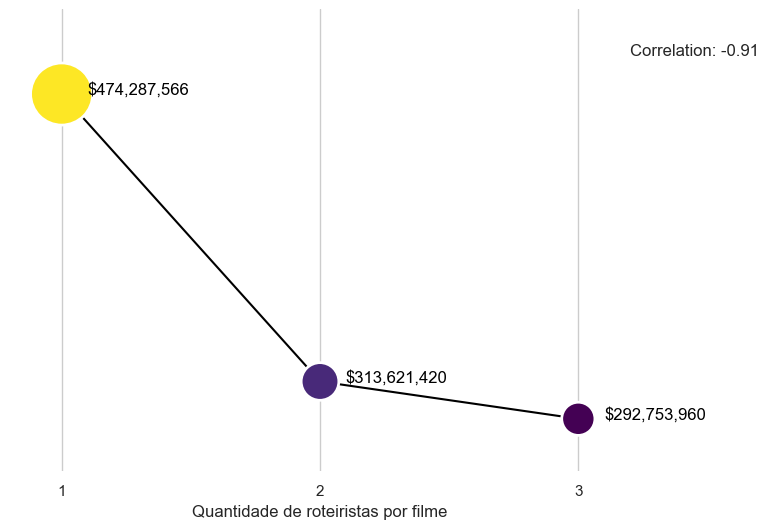

In [63]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='num_writers', y='BoxOffice', data=num_writers_boxoffice,color='black',zorder=1) 
ax = sns.scatterplot(x='num_writers', y='BoxOffice', data=num_writers_boxoffice,palette='viridis', hue='BoxOffice', size="BoxOffice",sizes=(570, 2000),legend=False,zorder=2) 
plt.text(x=1, y=0.9, s=f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes)
ax.spines[['top','right','left','bottom']].set_visible(False)
minBox = num_writers_boxoffice['BoxOffice'].min()
maxBox = num_writers_boxoffice['BoxOffice'].max()

plt.ylim(minBox * 0.9, maxBox * 1.1)
plt.xlim(num_writers_boxoffice['num_writers'].min() - 0.2, num_writers_boxoffice['num_writers'].max() + 0.2)
plt.xlabel("Quantidade de roteiristas por filme") 
plt.ylabel("") 
plt.xticks(np.arange(num_writers_boxoffice['num_writers'].min(), len(num_writers_boxoffice['num_writers'])+1, 1)) 
plt.yticks([]) 

for line in range(0,num_writers_boxoffice.shape[0]):
     ax.text(num_writers_boxoffice['num_writers'][line]+0.1, num_writers_boxoffice['BoxOffice'][line],
             f"${num_writers_boxoffice['BoxOffice'][line]:,.0f}", 
             horizontalalignment='left',
             size='medium',
             color='black',
             weight='light')


plt.show()

In [64]:

fig = plt.gcf()
dpi = fig.dpi
ax = sns.barplot(x="num_awards", y="title", data=df_awards, palette="viridis", hue="title")
ax.spines[['top','right','left','bottom']].set_visible(False)

for index, p in enumerate(ax.patches):
    awards = f"{df_awards['num_awards'][index]:.0f}"
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(    
        f'{awards}',
        (x + width*1.01, y + height/2),
        ha='left',
        va='center',
        color='black',
    )
    
plt.title("Top Filmes por Premiações Oscar")
plt.xlabel("")
plt.ylabel("") 
plt.xticks([])
plt.show()

NameError: name 'df_awards' is not defined

<Figure size 1000x600 with 0 Axes>